<h1>Model Development</h1>

<p>Lets develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.</p>


<p>We often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('dataset/final_data.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h3> Linear Regression and Multiple Linear Regression</h3>

<h4>Linear Regression</h4>


<p>One example of a Data  Model that we will be using is</p>
<b>Simple Linear Regression</b>.

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>



$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$


 <b>Linear function:</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

In [2]:
#Lets load the modules for linear regression
from sklearn.linear_model import LinearRegression
#Create the object
lm = LinearRegression()
lm

LinearRegression()

Lets create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable to see whether highway-mpg would help us to predict the car price

In [3]:
X = df[['highway-mpg']]
Y = df['price']
#Fit the linear model using highway-mpg
lm.fit(X,Y)

LinearRegression()

 We can output a prediction 

In [4]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<h4>Lets get the value of intercept (a) and Slope (b)</h4>

In [5]:
print(lm.intercept_)
print(lm.coef_)

38423.3058581574
[-821.73337832]


Plugging in the actual values we get:

<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>

Lets create a linear function with "engine-size" as the predictor variable and the "price" as the response variable to see whether engine-size would help us to predict the car price

In [6]:
lm1 = LinearRegression()
X = df[['engine-size']]
Y = df['price']
lm1.fit(X,Y)

LinearRegression()

In [7]:
Yhat=lm1.predict(X)
Yhat[0:5]   

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [8]:
print(lm1.intercept_)
print(lm1.coef_)

-7963.338906281046
[166.86001569]


Plugging in the values ,we get

<b>price</b> = -7963.338906281049 + 166.86001569 x <b>engine-size</b>

<h4>Multiple Linear Regression</h4>

<p>This method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors.

$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$

$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

The equation is given by

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.

In [9]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
#Fit the linear model
lm.fit(Z, df['price'])

LinearRegression()

In [10]:
print(lm.intercept_)
print(lm.coef_)

-15806.624626329194
[53.49574423  4.70770099 81.53026382 36.05748882]


<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>

<h3>  Model Evaluation using Visualization</h3>

To evaluate our models and to choose the best one? One way to do this is by using visualization.

In [11]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

<h3>Regression Plot</h3>

 Let's visualize Horsepower as potential predictor variable of price:

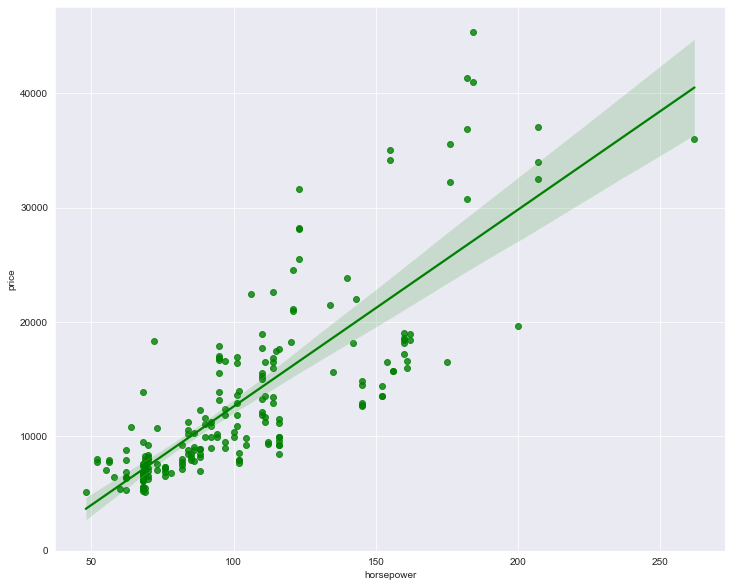

In [12]:
plt.figure(figsize = (12,10))
sns.regplot(x='horsepower',y='price',data=df ,color='green')
plt.ylim(0,);


<p>We can see from this plot that <b>price is negatively correlated to highway-mpg, since the regression slope is negative</b>

<p>Let's compare this plot to the regression plot of "peak-rpm".</p>

(0.0, 47414.1)

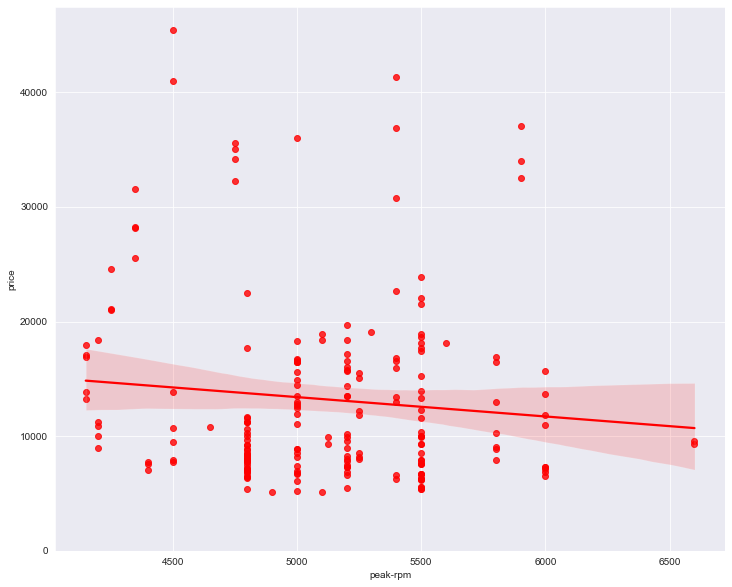

In [13]:
plt.figure(figsize=(12, 10))
sns.regplot(x="peak-rpm", y="price", data=df , color='red')
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease.It is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.</p>

In [14]:
 df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


The variable "peak-rpm" has a stronger correlation with "price", it is approximate -0.704692  compared to   "highway-mpg" which is approximate -0.101616.

(0.0, 33129.93533408737)

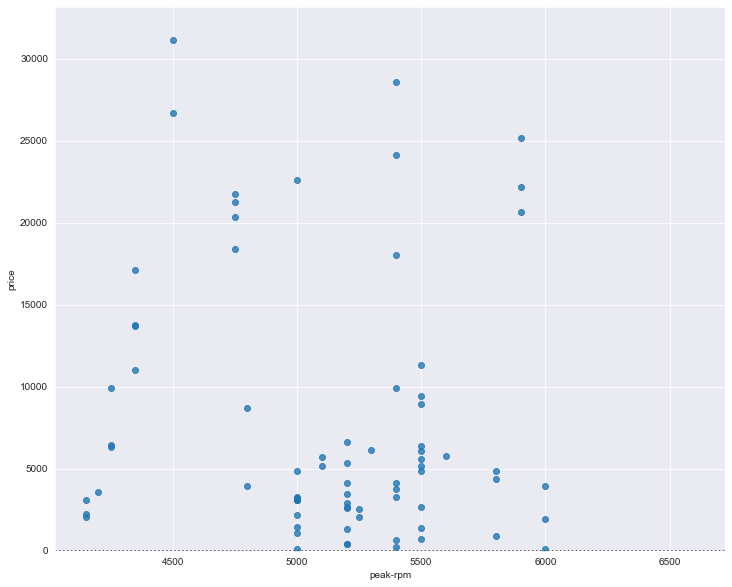

In [15]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>We can see from this residual plot - residuals are not randomly spread around the x-axis,thus a non-linear model is more appropriate for this data.</p>

<h3>Multiple Linear Regression</h3>

<p>Visualizing a model for Multiple Linear Regression<p>
<p><b> Distribution plot</b> : Compare the distribution of the fitted values that result from the model and distribution of the actual values.</p>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


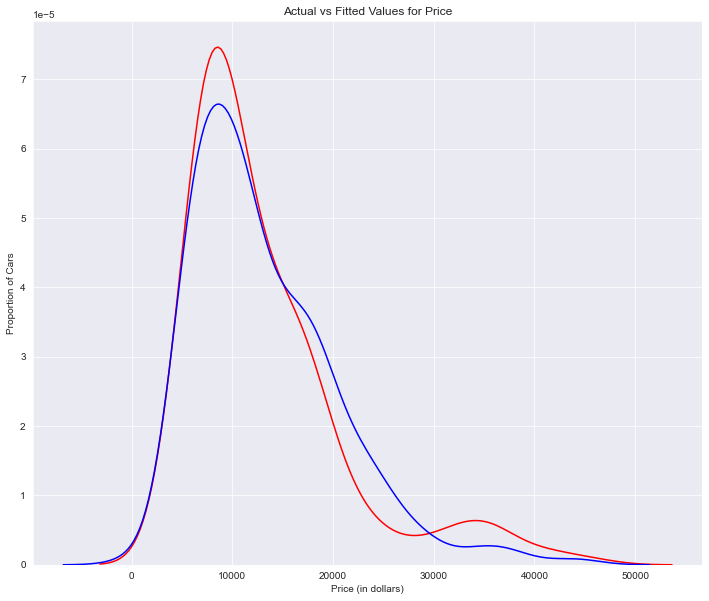

In [16]:
Yhat = lm.predict(Z)
plt.figure(figsize=(width,height))
ax1=sns.distplot(df['price'],hist=False,color="r",label="Actual Values")
sns.distplot(Yhat,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()


<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

<h2> Measures for In-Sample Evaluation</h2>

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b> : R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b> : The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>

<h3>Model 1: Simple Linear Regression</h3>

* Let's calculate the R^2

In [17]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
lm.score(X, Y)

0.7609686443622008

We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

* Let's calculate the MSE

In [18]:
#We can predict the output i.e., "yhat" using the predict method, where X is the input variable:
Yhat=lm.predict(X)
Yhat[0:4]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408])

In [19]:
#import the function mean_squared_error from the module metrics
from sklearn.metrics import mean_squared_error
#compare the predicted results with the actual results
mse = mean_squared_error(df['price'], Yhat)
mse

15021126.025174143

<h3>Model 2: Multiple Linear Regression</h3>

* Let's calculate the R^2

In [20]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
lm.score(Z, df['price'])

0.8093562806577457

We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

* Let's calculate the MSE

In [21]:
# Produce a prediction 
Y_predict_multifit = lm.predict(Z)
# Compare the predicted results with the actual results
# The mean square error of price and predicted value using multifit is: 
mean_squared_error(df['price'], Y_predict_multifit)

11980366.87072649

<h2>Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>We trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction.</p>
<p>Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>

In [22]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input 

In [23]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

 Fit the model 

In [24]:
lm.fit(X, Y)
lm

LinearRegression()

Produce a prediction

In [25]:
yhat=lm.predict(new_input)
yhat[0:5]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

Plot the data 

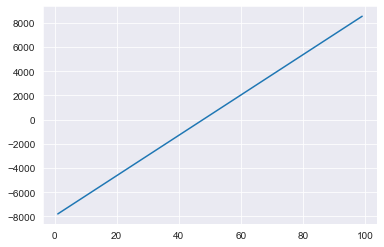

In [26]:
plt.plot(new_input, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>

* <b>Model with the higher R-squared value is a better fit</b> for the data.

* <b>Model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>

<p><b>Simple Linear Regression</b> : Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p><b>Multiple Linear Regression</b> : Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>

<h2>Conclusion:</h2>

<p>Comparing these two models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>